## Detect anomalies in the time series

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import hmmlearn.hmm as hmm

# load the data
print('Loading data...')
series = []
with open('./data/ibm.csv', 'r') as file:
    for i, line in enumerate(file):
        if i > 0:
            parts = line.split(',')
            if len(parts) == 2:
                stock = float(parts[1])
                series.append([stock])
print('Loaded {} samples.'.format(len(series)))

Loading data...
Loaded 1008 samples.


In [17]:
# construct the model
model = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=1000)

# fit the model
print('Fitting model...')
model.fit(series)

Fitting model...


GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=3, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [18]:
# detect anomalies in the time series
states = []
states = model.predict(series)

anomalies = []
for i in range(len(series)-1):
    if states[i+1] != states[i]:
        anomalies.append(i+1)

Anomalies: [81, 98, 318, 374, 405, 501, 598, 664, 766, 918]
Model means: [[ 541.1524677 ]
 [ 399.40673967]
 [ 465.89044485]]
Model covariances: [[[ 776.47211398]]

 [[ 907.68587587]]

 [[ 224.55870982]]]
Initial probabilities: [  1.00000000e+000   1.01263045e-169   3.71674599e-107]
Transition matrix: [[ 0.99  0.    0.01]
 [ 0.    0.99  0.01]
 [ 0.01  0.01  0.99]]


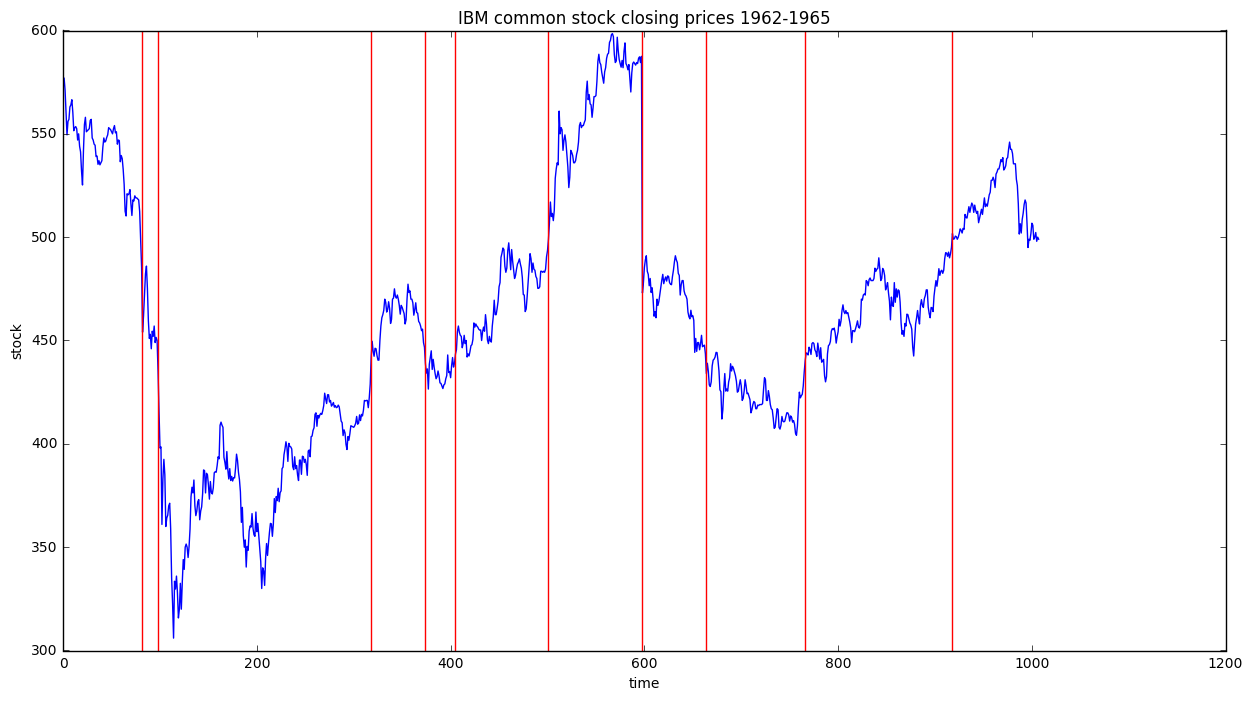

In [19]:
print('Anomalies: {}'.format(anomalies))
print('Model means: {}'.format(model.means_))
print('Model covariances: {}'.format(model.covars_))
print('Initial probabilities: {}'.format(model.startprob_))
print('Transition matrix: {}'.format(np.round(model.transmat_, 2)))

plt.plot(series)
plt.title('IBM common stock closing prices 1962-1965')
plt.xlabel('time')
plt.ylabel('stock')
for anomaly in anomalies:
    plt.axvline(anomaly, color='r')
plt.show()

In [20]:
# predict from the model
Z = model.predict(series)
counts = [
    sum([z == 0 for z in Z]),
    sum([z == 1 for z in Z]),
    sum([z == 2 for z in Z])
]
print(counts)
print([c / len(series) for c in counts])

[268, 353, 387]
[0.26587301587301587, 0.35019841269841268, 0.38392857142857145]


## hmm test

In [21]:
# Required imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm, base
import sklearn.preprocessing as pp
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import math
import sklearn.metrics as sm
import statsmodels.api as sta
from statsmodels.tsa.ar_model import AR
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 15, 8
np.random.seed(42)

In [22]:
# Reading in Data and Splitting for training and testing
# 2000 Obs = 1600 train + 400 test
filename = './data/data_test.csv'
data = pd.read_csv(filename, header=None)
train = data[:1600]
test = data[1600:]

Number of states for Markov Model is 3. The set of observations is {1,2,3,4,5}.

In [23]:
states = [0,1,2]
observations = [1,2,3,4,5]
seq = list(train[0])

## Task 1 - Develop a Hidden Markov Model

Use an HMM solver to estimate the HMM parameters P=(pij), π, and B=(bik).Run the model to predict the next 400 observations, and compare the HMM results to thetraining data set and compute the sum of squared errors (SSE), the root mean squared error, and R2.  

In [24]:
# Encoding data from 1--5 to 0--4 as required by the HMMLearn package
# Transforming data into 1600*1 column matrix for computation

labels = pp.LabelEncoder()
data_mod = labels.fit_transform(data).reshape(-1, 1)
train_mod = labels.fit_transform(train).reshape(-1, 1)
test_mod = labels.fit_transform(test).reshape(-1, 1)

/software/anaconda3/4.2.0/lib/python3.5/site-packages/sklearn/preprocessing/label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/software/anaconda3/4.2.0/lib/python3.5/site-packages/sklearn/preprocessing/label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/software/anaconda3/4.2.0/lib/python3.5/site-packages/sklearn/preprocessing/label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
# Ref: https://jyyuan.wordpress.com/2014/01/28/baum-welch-algorithm-finding-parameters-for-our-hmm/
prob_eq = [1/len(observations)] * len(observations)
state_change_prob = 1/len(states)
state_change_prob_eq = [state_change_prob] * len(states)
A = np.array([[state_change_prob_eq] * len(states)])
B = np.array([[0.19,0.21,0.17,0.23,0.2],
             [0.23,0.21,0.18,0.22,0.16],
             [0.18,0.18,0.21,0.19,0.24]])
hmm_model = hmm.MultinomialHMM(n_components=len(states), tol=0.0001, n_iter=200)
hmm_model.transmat_ = A
hmm_model.emissionprob_ = B
hmm_model.startprob_ = np.array([0.35, 0.25, 0.4])
hmm_model.fit(train_mod)

MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=3,
        n_iter=200, params='ste',
        random_state=<mtrand.RandomState object at 0x2b8ca09dc3a8>,
        startprob_prior=1.0, tol=0.0001, transmat_prior=1.0, verbose=False)

We want to learn a model lambda(A,B,Pi) from these observations. We are solving Problem 3 of HMMs.

Baum-Welch algorithm is considered to be an application of Expectation Maximization (EM) algorithm for use with HMMs. We start with some sort of prior A and B matrix, possibly a trivial one with completely uniform probabilities, and we have a set of observations from the HMM. We use the forward-backward algorithm to calculate the probabilities of being in each state at each time step, and then we use this estimate of probabilities to make a better estimate of the transition and emission matrices.

The HMMLearn package from Python can do this for us; but it gets stuck in a local Maxima during the Maximization step of the algorithm. We have to start with a Prior as close as possible to the Original Prior to avoid that. But as we do not know anything about the data at hand, we can just take a wild guess (or hope that the local maxima we get stuck in isn't far off from the global maxima).

In [26]:
print("Score: %f" % hmm_model.score(train_mod))
print("Initial Vector (Pi): %r" % hmm_model.startprob_)
print("Transition Probability (A): \n %r" % hmm_model.transmat_)
print("Emission Probability (B): \n %r" % hmm_model.emissionprob_)

Score: -2517.280518
Initial Vector (Pi): array([  2.34889666e-92,   3.94468600e-03,   9.96055314e-01])
Transition Probability (A): 
 array([[ 0.31027635,  0.23689515,  0.4528285 ],
       [ 0.06419606,  0.62667562,  0.30912832],
       [ 0.59123146,  0.34243379,  0.06633475]])
Emission Probability (B): 
 array([[ 0.20136604,  0.20347226,  0.1259785 ,  0.31454165,  0.15464155],
       [ 0.15259706,  0.00109666,  0.35587197,  0.1903032 ,  0.3001311 ],
       [ 0.00140104,  0.45828376,  0.25872768,  0.25802408,  0.02356345]])


As metioned above, as we have used random (or uniform) estimates for A, B, and Pi, our model does not perform great; but it does give us an estimate of the final expected variables.

The local score indicates that we can improve our initial assumptions and try if we reach global maxima.

In [27]:
_, post_prob = hmm_model.score_samples(train_mod)
test_pi = post_prob[-1]
hmm_model.startprob_ = np.dot(test_pi, hmm_model.transmat_)
_, test_predicted = hmm_model.sample(n_samples=len(test_mod), random_state=7656)
accuracy = np.sum(test_predicted == test_mod)/len(test_mod)
print("Accuracy: %f" % accuracy)

Accuracy: 73.720000


Now, to estimate the next 400 observations based on our model and 1600 observed data, we can use two techniques, the first of which is described above. We randomly predict a set of 400 observations from our model, and say that these are the next 400 observations. Surprisingly, this give us an accuracy of about 70%.

In [28]:
def get_errors(predicted, observed):
    sse = np.sum((predicted - observed)**2)
    rmse = sqrt(mean_squared_error(observed, predicted))
    r_squared = r2_score(observed, predicted)
    return sse, rmse, r_squared

hmm_sse, hmm_rmse, hmm_r_squared = get_errors(test_predicted, test_mod)
print("SSE: %f \nRMSE: %f \nR^2: %f" % (hmm_sse, hmm_rmse, hmm_r_squared))

SSE: 606568.000000 
RMSE: 1.907223 
R^2: -1.141091


If you take a look at the SSE Square, it is pretty high (because you have 4 other possible states). Also, in case of categoritcal data, using a metric like accuracy gives you a better perspective about the performance of the estimate.

So even though our SSE and RMSE have high values, and our R^2 value is negative, based on our high accuracy, we can say that the random prediction works out well.

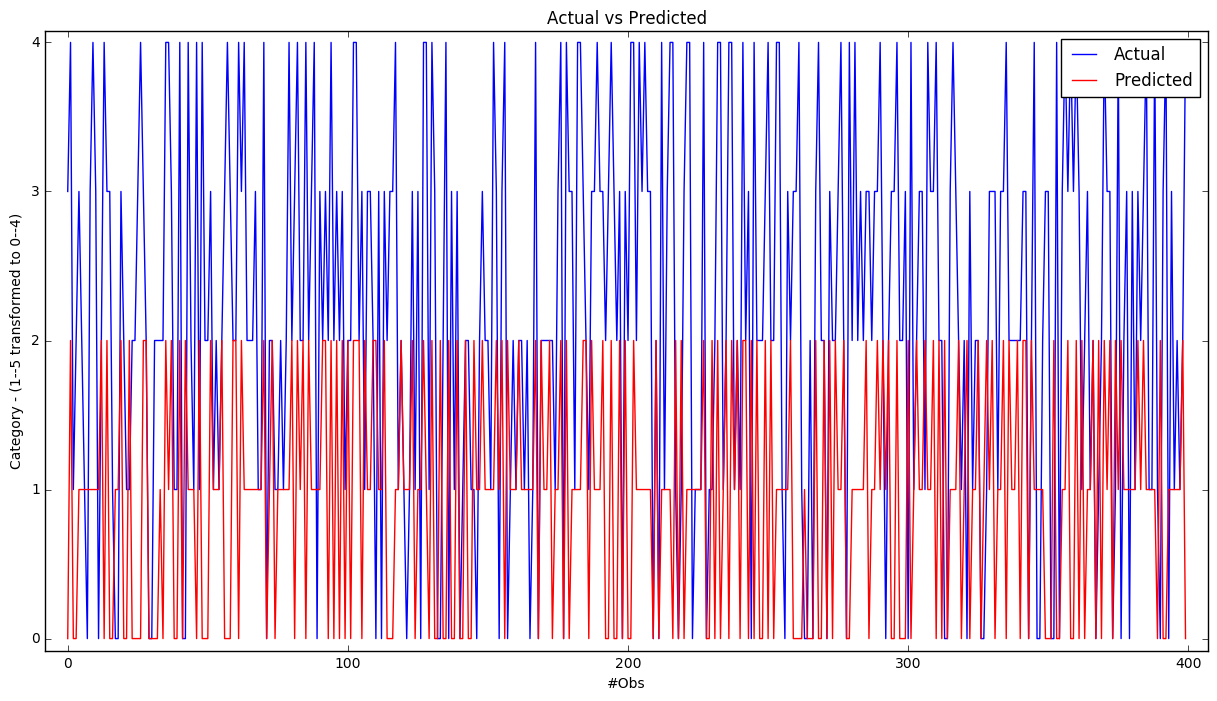

In [29]:
plt.plot(test_mod, color='blue', label="Actual")
plt.plot(test_predicted, color='red', label="Predicted")
plt.title("Actual vs Predicted")
plt.xlabel("#Obs")
plt.ylabel("Category - (1--5 transformed to 0--4)")
plt.margins(0.02)
plt.legend()
plt.show()

##  Task 2 - How much into the future can I forecast?

The HMM model produces good results at the beginning, but then its accuracy declines as we go further away from the 1601st observation. You can observe this by doing a line plot of the actual vs the estimated results.

This can be resolved by retraining your HMM model. The question is how well your model can predict the n next estimates. If it can be good for n=10, for instance, then retrain your HMM every 10 observations using the entire set of data up to that point, or 1600 observations shifted to the point.

Vary n to find a good value. For each n calculate the sum of squared errors (SSE), the root mean squared error, and R2 obtained over the 400 hundred observations.

In [31]:
hmm_w_model = hmm.MultinomialHMM(n_components=len(states), tol=0.0001, n_iter=100)
hmm_w_model.transmat_ = A
hmm_w_model.emissionprob_ = B
hmm_w_model.startprob_ = np.array(state_change_prob_eq)

In [32]:
def window_predict(index, window):
    train = data_mod[index+window-1600:index + window]
    test = data_mod[index + window: index + 2*window]
    hmm_w_model.fit(train)
    _, posterior = hmm_w_model.score_samples(train)
    lastprob = posterior[-1]
    hmm_w_model.startprob_ = np.dot(lastprob, hmm_w_model.transmat_)
    prediction, state = hmm_w_model.sample(n_samples=window, random_state=7656)
    return prediction

In [33]:
test_len = len(test_mod)
total_see, total_rmse, total_r2 = [], [], []
for window in range(2, 10+1):
    prediction = np.array((0,1))
    itrns = int(test_len/window)
    last_itrn = test_len - itrns*window
    for i in range(itrns+1):
        prediction = np.append(prediction, window_predict(1600+i*window, window))
    hmm_w_model.fit(data_mod[:1600 + itrns*window + window])
    last_pred, _ = hmm_w_model.sample(n_samples=last_itrn, random_state=7656)
    prediction = np.append(prediction, last_pred)
    sse, rmse, rsquare = get_errors(prediction[:test_len], test_mod)
    total_sse.append(sse)
    total_rmse.append(rmse)
    total_r2.append(rsquare)

In [35]:
window = list(range(2, 10+1))
table_op = np.stack((np.array(window), np.array(total_sse), np.array(total_rmse), np.array(total_r2)))

In [39]:
print(table_op)
hmm_window = 7

[[  2.00000000e+00   3.00000000e+00   4.00000000e+00   5.00000000e+00
    6.00000000e+00   7.00000000e+00   8.00000000e+00   9.00000000e+00
    1.00000000e+01]
 [  5.62352000e+05   6.08880000e+05   5.14408000e+05   6.06536000e+05
    5.69712000e+05   5.67504000e+05   5.49824000e+05   5.52832000e+05
    5.53960000e+05]
 [  1.84119526e+00   1.98871818e+00   1.76705970e+00   1.91115149e+00
    1.83711731e+00   1.89208879e+00   1.82619824e+00   1.85741756e+00
    1.83371208e+00]
 [ -9.95408794e-01  -1.32797693e+00  -8.37953970e-01  -1.14992054e+00
   -9.86579551e-01  -1.10724586e+00  -9.63034905e-01  -1.03072576e+00
   -9.79221849e-01]]


From above data, we observe the minimum error (based on all three - SSE, RMSE, R^2) for window size of 7. Hence, keeping a window size of 7 will give us best results.